**<font size='6' color='aqua'>ch04. RNN(Recurrent Neural Network) 순환신경망</font>**
# 1. 문맥을 이용하여 모델 만들기 - 전처리

In [1]:
text = '''경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다'''

In [2]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0]
print(encoded)
print(t.word_index)

[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [3]:
# 문자열 리스트를 인덱스 시퀀스로 반환
print(t.texts_to_sequences(['경마장에 말이 있다', '말이 곱다']))
print(t.texts_to_sequences(['경마장에 말이 있다'])[0])

[[2, 1, 5], [1, 11]]
[2, 1, 5]


In [4]:
print(t.texts_to_matrix(['말이 뛰고'])) # 원핫인코딩 같은것
print(t.texts_to_sequences('말이 뛰고'))

[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[], [], [], [], []]


In [5]:
print(t.word_index)
for word, value in t.word_index.items():
    if value==2:
        print("2:", word)
        break

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}
2: 경마장에


In [6]:
# text를 학습시키기 위해 ['경마장에 있는','경마장에 있는 말이','경마장에 있는 말이 뛰고']
sequences = []
for line in text.split('\n'):
    print('원래 문장 :', line)
    encoded = t.texts_to_sequences([line])[0]
    print('encoded된 문장 :', encoded)
    for i in range(0, len(encoded)-1): # 시작 index(빨간색 화살표)
        for j in range(i+2, len(encoded)+1): # 끝나는 index(파란색 화살표) 끝나는 숫자 뒤까지 하기위해 +1
            sequences.append(encoded[i:j])
# sequences
print('sequences와 해석을 출력')
for sequence in sequences :
    print('[', end='')
    for word_seq in sequence:
        for word, value in t.word_index.items():
            if word_seq == value:
                print("{}:{}".format(word_seq, word), end=' ')
                break
    print(']')

원래 문장 : 경마장에 있는 말이 뛰고 있다
encoded된 문장 : [2, 3, 1, 4, 5]
원래 문장 : 그의 말이 법이다
encoded된 문장 : [6, 1, 7]
원래 문장 : 가는 말이 고와야 오는 말이 곱다
encoded된 문장 : [8, 1, 9, 10, 1, 11]
sequences와 해석을 출력
[2:경마장에 3:있는 ]
[2:경마장에 3:있는 1:말이 ]
[2:경마장에 3:있는 1:말이 4:뛰고 ]
[2:경마장에 3:있는 1:말이 4:뛰고 5:있다 ]
[3:있는 1:말이 ]
[3:있는 1:말이 4:뛰고 ]
[3:있는 1:말이 4:뛰고 5:있다 ]
[1:말이 4:뛰고 ]
[1:말이 4:뛰고 5:있다 ]
[4:뛰고 5:있다 ]
[6:그의 1:말이 ]
[6:그의 1:말이 7:법이다 ]
[1:말이 7:법이다 ]
[8:가는 1:말이 ]
[8:가는 1:말이 9:고와야 ]
[8:가는 1:말이 9:고와야 10:오는 ]
[8:가는 1:말이 9:고와야 10:오는 1:말이 ]
[8:가는 1:말이 9:고와야 10:오는 1:말이 11:곱다 ]
[1:말이 9:고와야 ]
[1:말이 9:고와야 10:오는 ]
[1:말이 9:고와야 10:오는 1:말이 ]
[1:말이 9:고와야 10:오는 1:말이 11:곱다 ]
[9:고와야 10:오는 ]
[9:고와야 10:오는 1:말이 ]
[9:고와야 10:오는 1:말이 11:곱다 ]
[10:오는 1:말이 ]
[10:오는 1:말이 11:곱다 ]
[1:말이 11:곱다 ]


In [7]:
sequences[:5]

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [3, 1]]

In [8]:
# sequence별 len
print([len(sequence) for sequence in sequences])

[2, 3, 4, 5, 2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 2, 3, 4, 2, 3, 2]


In [9]:
my_len = max([len(sequence) for sequence in sequences])
my_len

6

In [10]:
# sequencec를 훈련 가능하도록 6개열 조정
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences=sequences,
                                maxlen=my_len,
#                                 padding='post',  
                                padding='pre', # 최대 열수보다 작은 경우 0을 채울 위치
#                                 truncating='post', # 최대 열수보다 많은 경우 데이터를 자를 위치
#                                 value=1, 사용하지않음 
                                )
type(padded_sequences), padded_sequences.shape, padded_sequences

(numpy.ndarray,
 (28, 6),
 array([[ 0,  0,  0,  0,  2,  3],
        [ 0,  0,  0,  2,  3,  1],
        [ 0,  0,  2,  3,  1,  4],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  3,  1],
        [ 0,  0,  0,  3,  1,  4],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  1,  4],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0,  0,  4,  5],
        [ 0,  0,  0,  0,  6,  1],
        [ 0,  0,  0,  6,  1,  7],
        [ 0,  0,  0,  0,  1,  7],
        [ 0,  0,  0,  0,  8,  1],
        [ 0,  0,  0,  8,  1,  9],
        [ 0,  0,  8,  1,  9, 10],
        [ 0,  8,  1,  9, 10,  1],
        [ 8,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  1,  9],
        [ 0,  0,  0,  1,  9, 10],
        [ 0,  0,  1,  9, 10,  1],
        [ 0,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  9, 10],
        [ 0,  0,  0,  9, 10,  1],
        [ 0,  0,  9, 10,  1, 11],
        [ 0,  0,  0,  0, 10,  1],
        [ 0,  0,  0, 10,  1, 11],
        [ 0,  0,  0,  0,  1, 11]]))

In [11]:
# 독립변수(x)와 타겟변수(종속변수 y)로 분리
X = padded_sequences[:, :-1]
y = padded_sequences[:, -1]
y

array([ 3,  1,  4,  5,  1,  4,  5,  4,  5,  5,  1,  7,  7,  1,  9, 10,  1,
       11,  9, 10,  1, 11, 10,  1, 11,  1, 11, 11])

In [12]:
# 단어 갯수
vocab_size = len(t.word_index)

In [13]:
# 원핫인코딩
import pandas as pd
from tensorflow.keras.utils import to_categorical
Y = to_categorical(y, vocab_size+1) # 원핫인코딩 카테고리 수
Y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [14]:
X.shape, Y.shape

((28, 5), (28, 12))

# 2. 모델 생성 (RNN)
- 순서가 의미 있는 데이터를 학습할 경우 ex. 자연어처리. 연주, 주식, 날씨 ....

In [15]:
from tensorflow.keras.models import Sequential # 순차적 레이어 모델 생성
from tensorflow.keras.layers import Embedding, SimpleRNN # 긴 희소행렬변환, RNN
from tensorflow.keras.layers import Dense

model = Sequential()
# 희소행렬(12) -> 10열 행렬(28개 = 독립변수 행수)
model.add(Embedding(input_dim=vocab_size+1, # 12개 입력
                    output_dim=vocab_size-1, # 10개 출력하기 위한 embedding
                    input_length = X.shape[1] # 데이터 수
                   ))
model.add(SimpleRNN(units=32))
model.add(Dense(units=12, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 10)             120       
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1376      
                                                                 
 dense (Dense)               (None, 12)                396       
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________
None


# 3. 학습과정 설정 및 학습하기

In [16]:
model.compile(loss='categorical_crossentropy',  # 다중분류에서의 손실함수
              optimizer='adam', 
              metrics=['accuracy'])  # 평가지표 : accuracy, recall, precision
hist = model.fit(x=X, y=Y, epochs=300, verbose=2)

Epoch 1/300
1/1 - 1s - loss: 2.4770 - accuracy: 0.0714 - 1s/epoch - 1s/step
Epoch 2/300
1/1 - 0s - loss: 2.4645 - accuracy: 0.1429 - 14ms/epoch - 14ms/step
Epoch 3/300
1/1 - 0s - loss: 2.4520 - accuracy: 0.1786 - 16ms/epoch - 16ms/step
Epoch 4/300
1/1 - 0s - loss: 2.4392 - accuracy: 0.2857 - 14ms/epoch - 14ms/step
Epoch 5/300
1/1 - 0s - loss: 2.4263 - accuracy: 0.3571 - 16ms/epoch - 16ms/step
Epoch 6/300
1/1 - 0s - loss: 2.4129 - accuracy: 0.5357 - 14ms/epoch - 14ms/step
Epoch 7/300
1/1 - 0s - loss: 2.3991 - accuracy: 0.6071 - 14ms/epoch - 14ms/step
Epoch 8/300
1/1 - 0s - loss: 2.3847 - accuracy: 0.5714 - 0s/epoch - 0s/step
Epoch 9/300
1/1 - 0s - loss: 2.3697 - accuracy: 0.5357 - 4ms/epoch - 4ms/step
Epoch 10/300
1/1 - 0s - loss: 2.3539 - accuracy: 0.5357 - 16ms/epoch - 16ms/step
Epoch 11/300
1/1 - 0s - loss: 2.3373 - accuracy: 0.5357 - 16ms/epoch - 16ms/step
Epoch 12/300
1/1 - 0s - loss: 2.3198 - accuracy: 0.5357 - 0s/epoch - 0s/step
Epoch 13/300
1/1 - 0s - loss: 2.3013 - accuracy: 0.

Epoch 104/300
1/1 - 0s - loss: 1.0819 - accuracy: 0.6071 - 16ms/epoch - 16ms/step
Epoch 105/300
1/1 - 0s - loss: 1.0717 - accuracy: 0.6071 - 0s/epoch - 0s/step
Epoch 106/300
1/1 - 0s - loss: 1.0616 - accuracy: 0.6071 - 16ms/epoch - 16ms/step
Epoch 107/300
1/1 - 0s - loss: 1.0517 - accuracy: 0.6071 - 0s/epoch - 0s/step
Epoch 108/300
1/1 - 0s - loss: 1.0419 - accuracy: 0.6071 - 16ms/epoch - 16ms/step
Epoch 109/300
1/1 - 0s - loss: 1.0323 - accuracy: 0.6071 - 16ms/epoch - 16ms/step
Epoch 110/300
1/1 - 0s - loss: 1.0228 - accuracy: 0.6071 - 0s/epoch - 0s/step
Epoch 111/300
1/1 - 0s - loss: 1.0135 - accuracy: 0.6429 - 0s/epoch - 0s/step
Epoch 112/300
1/1 - 0s - loss: 1.0043 - accuracy: 0.6429 - 16ms/epoch - 16ms/step
Epoch 113/300
1/1 - 0s - loss: 0.9952 - accuracy: 0.6429 - 16ms/epoch - 16ms/step
Epoch 114/300
1/1 - 0s - loss: 0.9862 - accuracy: 0.6429 - 16ms/epoch - 16ms/step
Epoch 115/300
1/1 - 0s - loss: 0.9773 - accuracy: 0.6429 - 7ms/epoch - 7ms/step
Epoch 116/300
1/1 - 0s - loss: 0.9

Epoch 206/300
1/1 - 0s - loss: 0.4708 - accuracy: 0.8929 - 10ms/epoch - 10ms/step
Epoch 207/300
1/1 - 0s - loss: 0.4677 - accuracy: 0.8929 - 3ms/epoch - 3ms/step
Epoch 208/300
1/1 - 0s - loss: 0.4646 - accuracy: 0.8929 - 16ms/epoch - 16ms/step
Epoch 209/300
1/1 - 0s - loss: 0.4616 - accuracy: 0.8929 - 0s/epoch - 0s/step
Epoch 210/300
1/1 - 0s - loss: 0.4586 - accuracy: 0.8929 - 0s/epoch - 0s/step
Epoch 211/300
1/1 - 0s - loss: 0.4557 - accuracy: 0.8929 - 24ms/epoch - 24ms/step
Epoch 212/300
1/1 - 0s - loss: 0.4528 - accuracy: 0.8929 - 0s/epoch - 0s/step
Epoch 213/300
1/1 - 0s - loss: 0.4499 - accuracy: 0.8929 - 0s/epoch - 0s/step
Epoch 214/300
1/1 - 0s - loss: 0.4470 - accuracy: 0.8929 - 16ms/epoch - 16ms/step
Epoch 215/300
1/1 - 0s - loss: 0.4442 - accuracy: 0.8929 - 16ms/epoch - 16ms/step
Epoch 216/300
1/1 - 0s - loss: 0.4413 - accuracy: 0.8929 - 16ms/epoch - 16ms/step
Epoch 217/300
1/1 - 0s - loss: 0.4386 - accuracy: 0.8929 - 0s/epoch - 0s/step
Epoch 218/300
1/1 - 0s - loss: 0.4358 

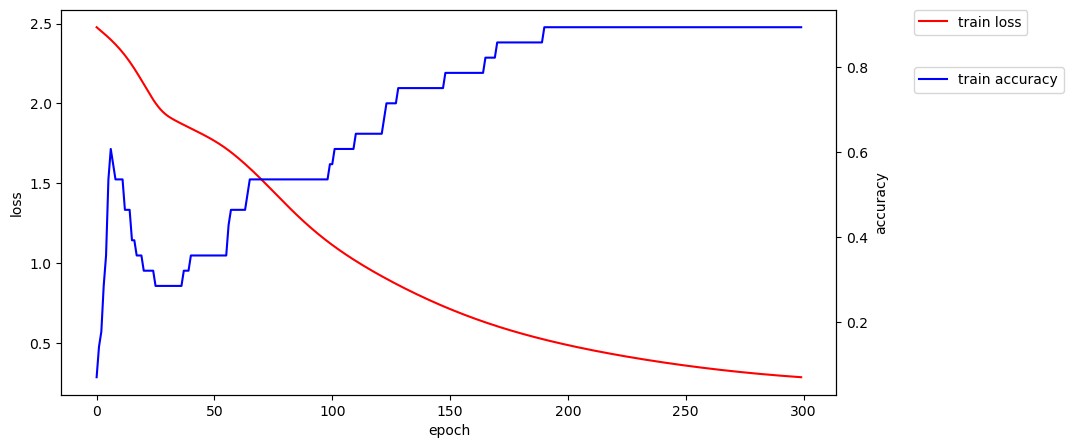

In [17]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.1, .85), loc=2, borderaxespad=0.)
plt.show()

# 4. 다음 문맥 예측해 보기

In [18]:
print(t.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [23]:
# 모델 사용하기 (문자 -> sequence로 수정 -> padding 처리 -> predict -> argmax() -> 문자)
word = input('입력 단어 : ')
encoded = t.texts_to_sequences([word])[0]  # 1차원
# print('입력한 단어 : {}, encoded : {}'.format(word, encoded))
input_data = pad_sequences([encoded],          # 2차원 데이터
                           maxlen=X.shape[1],  # 독립변수 열수
                           padding='pre')
print('입력한 단어 : {}, input_data : {}'.format(word, input_data))
pred = model.predict(input_data, verbose=0).argmax()
for word, value in t.word_index.items():
    if pred == value:
        print('예측된 단어 :', word)
        break

입력 단어 : 경마장에
입력한 단어 : 경마장에, input_data : [[0 0 0 0 2]]
예측된 단어 : 있는


In [49]:
# 단어(가는), 5 => 가는 말이 고와야 오는 말이 곱다
def sentence_generation(model, t, current_word, n):
    for i in range(n):  # n번 반복
        # current_word(encoded) -> sequence -> padding -> predict.argmax => 결과 단어(result)
        # current_word = current_word+' '+result
        encoded = t.texts_to_sequences([current_word])[0]
        input_data = pad_sequences([encoded], maxlen=X.shape[1], padding='pre')
        pred = model.predict(input_data, verbose=0).argmax()  # 숫자
        for word, value in t.word_index.items():
            if pred == value:
                result = word
#                 print('{} : {}'.format(i+1, result))
                current_word = current_word + ' ' + result
#                 print('{} : {}'.format(i+1, current_word))
                break
    return current_word

In [51]:
# 문맥 예측해 보기
sentence_generation(model, t, '경마장에', 4)

'경마장에 있는 말이 뛰고 있다'